In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import json
import random

with open('../products/json/data.json', 'r') as f:
    data = [
        ('../resources/' + x, '../resources/' + y, box)
        for x, y, box in json.load(f)
    ]

random.seed(0)
random.shuffle(data)

In [3]:
from dataset import LargeDataset, RandomTurn

trainset = RandomTurn(LargeDataset(data[:350], transform='tensor', color='jitter'))
validset = LargeDataset(data[350:400], transform='tensor')

print(len(trainset), len(validset))

29307 5314


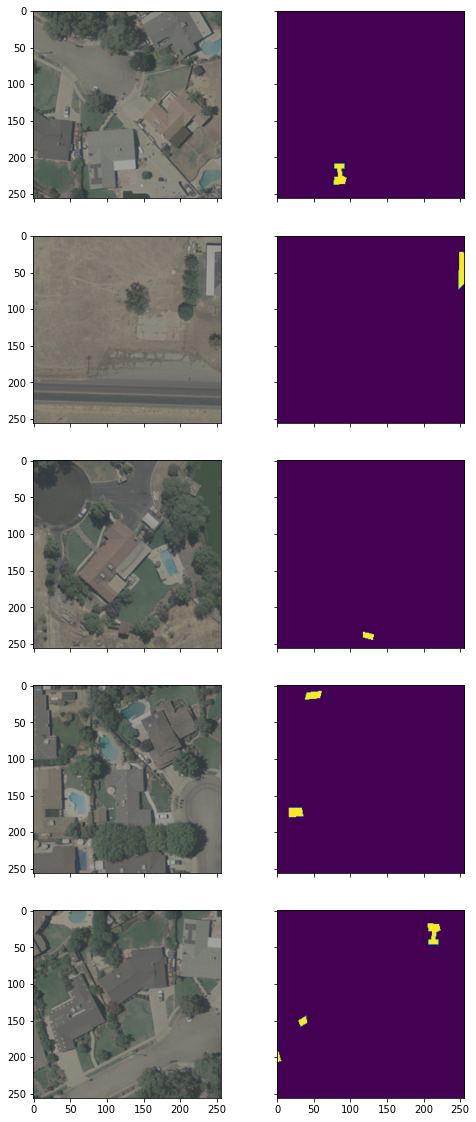

In [4]:
from torch.utils.data import DataLoader
from plots import plot_alongside

trainloader = DataLoader(trainset, batch_size=5)
validloader = DataLoader(validset, batch_size=5)

trainloader.dataset.shuffle()
for inputs, targets in trainloader:
    break

plot_alongside(inputs, targets)

In [5]:
import torch
from torchsummary import summary
from models import UNet

model = UNet(3, 1).cuda()
model.load_state_dict(torch.load('../products/models/unet_004.pth'))

summary(model, input_size=(3, 256, 256))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 256, 256]           1,792
       BatchNorm2d-2         [-1, 64, 256, 256]             128
              ReLU-3         [-1, 64, 256, 256]               0
            Conv2d-4         [-1, 64, 256, 256]          36,928
       BatchNorm2d-5         [-1, 64, 256, 256]             128
              ReLU-6         [-1, 64, 256, 256]               0
         MaxPool2d-7         [-1, 64, 128, 128]               0
            Conv2d-8        [-1, 128, 128, 128]          73,856
       BatchNorm2d-9        [-1, 128, 128, 128]             256
             ReLU-10        [-1, 128, 128, 128]               0
           Conv2d-11        [-1, 128, 128, 128]         147,584
      BatchNorm2d-12        [-1, 128, 128, 128]             256
             ReLU-13        [-1, 128, 128, 128]               0
        MaxPool2d-14          [-1, 128,

In [6]:
import train
import numpy as np
from criterions import DiceLoss, TP, TN, FP, FN

metrics = train.eval(model, validloader, [DiceLoss(), TP(), TN(), FP(), FN()])

print('DiceLoss, TP, TN, FP, FN =', np.mean(metrics, axis=0), '+-', np.std(metrics, axis=0))

DiceLoss, TP, TN, FP, FN = [4.51661427e-01 2.23567582e+03 3.23367938e+05 5.06396164e+02
 1.50833923e+03] +- [2.98935480e-01 6.30686486e+03 7.76015127e+03 8.45083707e+02
 2.54948328e+03]


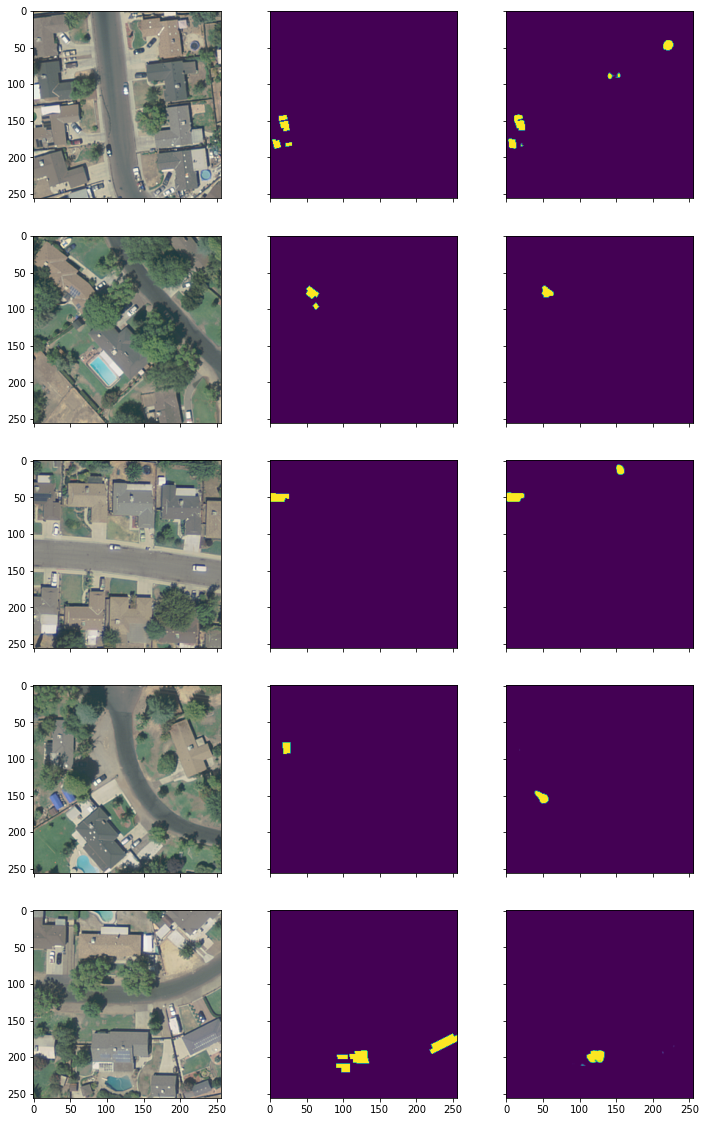

In [7]:
model.eval()

with torch.no_grad():
    validloader.dataset.shuffle()
    for inputs, targets in validloader:
            break

    inputs = inputs.cuda()
    targets = targets.cuda()
    outputs = model(inputs)

plot_alongside(
    inputs.cpu(),
    targets.cpu(),
    outputs.cpu()
)